In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_columns import childhood, demographic, diagnosis, all
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors

import warnings
warnings.filterwarnings("ignore")

In [12]:
init_df = pd.read_csv('./data/filtered_mental_health_data.csv')
init_df.shape

(5001, 594)

In [13]:
df = init_df.copy()
# df = df.replace(-9, np.nan)
# df = df.dropna()
df.shape

(5001, 594)

- filter out the diagnosis ds d_
- reuse function for threshold, need to supply one diag to get the filtered data then remove the diagnosis columns
    - positive values == "yes", can put in a list
- can try clustering with some dianosis in there max 5


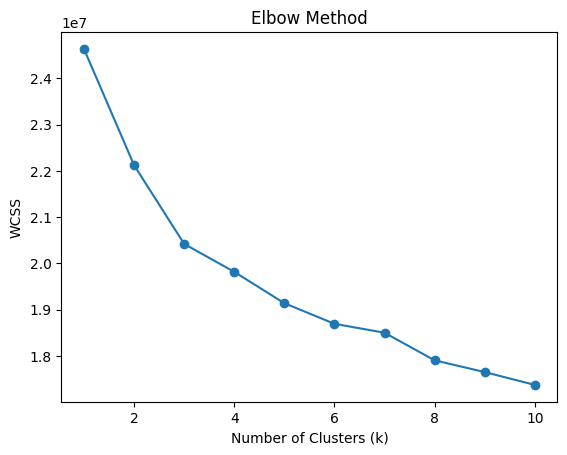

In [14]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_) # Within-Cluster Sum of Squares

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

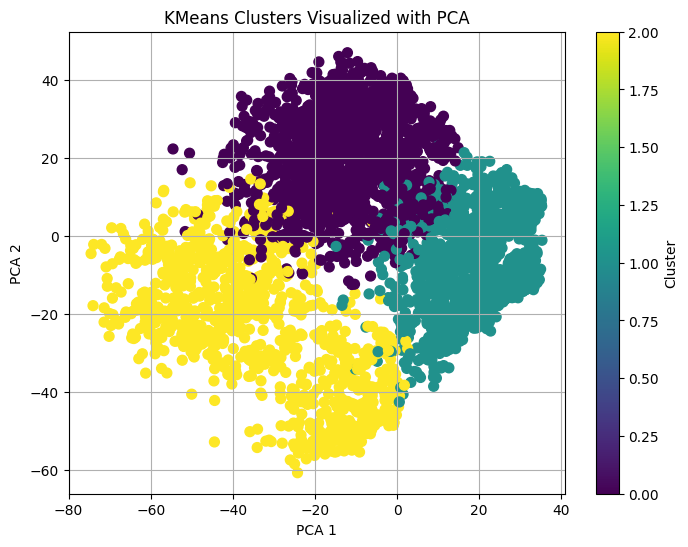

In [15]:
kmeans_df = df.copy()
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_df['cluster'] = kmeans.fit_predict(kmeans_df)

pca = PCA(n_components=2)
components = pca.fit_transform(kmeans_df.drop('cluster', axis=1))
kmeans_df['pca1'] = components[:, 0]
kmeans_df['pca2'] = components[:, 1]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(kmeans_df['pca1'], kmeans_df['pca2'], c=kmeans_df['cluster'], cmap='viridis', s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("KMeans Clusters Visualized with PCA")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [16]:
sil_coeff = silhouette_score(kmeans_df.drop('cluster', axis=1), kmeans_df["cluster"])
print("Silhouette Coefficient:", round(sil_coeff, 3))

Silhouette Coefficient: 0.167


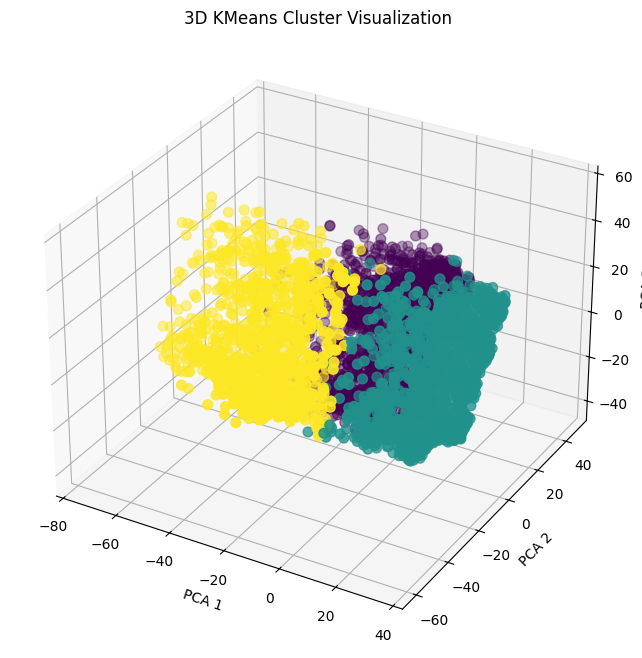

In [17]:
kmeans_df2 = df.copy()
kmeans2 = KMeans(n_clusters=3, random_state=42)
kmeans_df2['cluster'] = kmeans2.fit_predict(kmeans_df2)

pca2 = PCA(n_components=3)
components = pca2.fit_transform(kmeans_df2.drop('cluster', axis=1))
kmeans_df2['pca1'] = components[:, 0]
kmeans_df2['pca2'] = components[:, 1]
kmeans_df2['pca3'] = components[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(kmeans_df2['pca1'], kmeans_df2['pca2'], kmeans_df2['pca3'],c=kmeans_df2['cluster'], cmap='viridis', s=50)

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("3D KMeans Cluster Visualization")
plt.show()

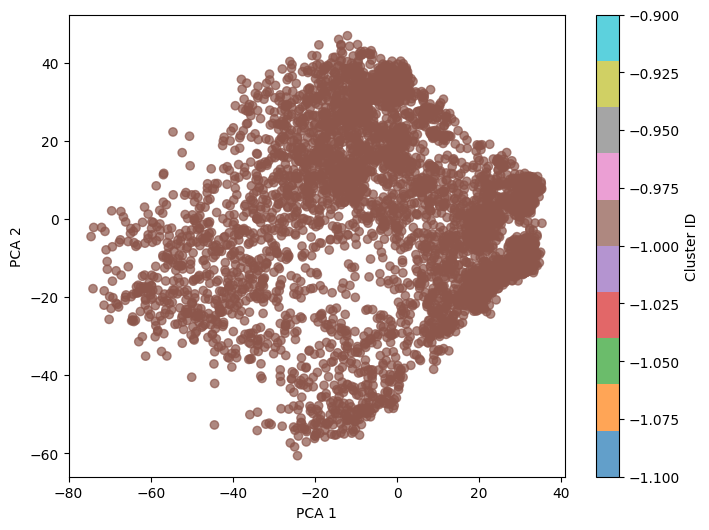

In [18]:
dbscan_df = df.copy()
dbscan = DBSCAN(eps=3, min_samples=10)
labels_db = dbscan.fit_predict(dbscan_df)

pca3 = PCA(n_components=2) 
X_pca = pca3.fit_transform(dbscan_df)

mask = labels_db != -1
X_pca_filtered = X_pca[mask]
labels_filtered = labels_db[mask]

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_db, cmap="tab10", alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster ID")
plt.show()

In [19]:
# sil_coeff2 = silhouette_score(dbscan_df, labels_db)
# print("Silhouette Coefficient:", round(sil_coeff2, 3))

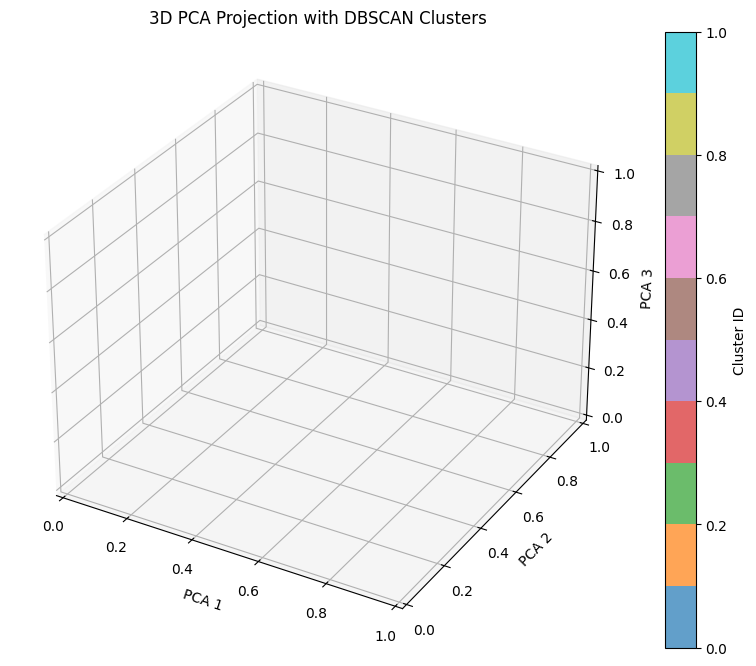

In [20]:
dbscan_df2 = df.copy()
dbscan2 = DBSCAN(eps=7, min_samples=10)
labels_db2 = dbscan2.fit_predict(dbscan_df2)

pca4 = PCA(n_components=3)
X_pca = pca4.fit_transform(dbscan_df2)

X_pca_filtered2 = X_pca[mask]
labels_filtered2 = labels_db2[mask]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_filtered2[:, 0], X_pca_filtered2[:, 1], X_pca_filtered2[:, 2],
                     c=labels_filtered2, cmap="tab10", alpha=0.7)

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("3D PCA Projection with DBSCAN Clusters")
fig.colorbar(scatter, label="Cluster ID")
plt.show()

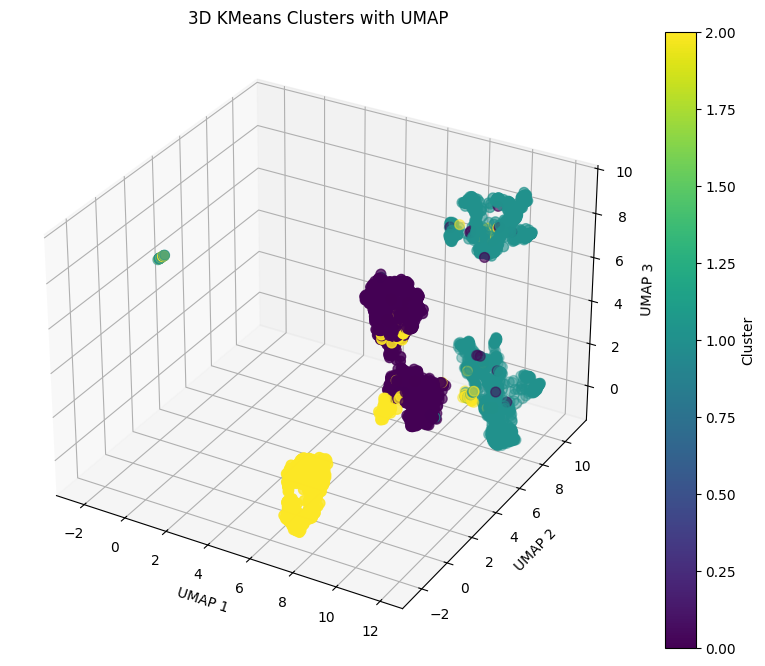

In [21]:
kmeans_df3 = df.copy()
kmeans3 = KMeans(n_clusters=3, random_state=42)
kmeans_df3['cluster'] = kmeans3.fit_predict(kmeans_df3)

reducer = umap.UMAP(n_components=3, random_state=42)
embedding = reducer.fit_transform(kmeans_df3.drop('cluster', axis=1))
kmeans_df3['umap1'] = embedding[:, 0]
kmeans_df3['umap2'] = embedding[:, 1]
kmeans_df3['umap3'] = embedding[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(kmeans_df3['umap1'], kmeans_df3['umap2'], kmeans_df3['umap3'],
                     c=kmeans_df3['cluster'], cmap='viridis', s=50)

ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_zlabel("UMAP 3")
ax.set_title("3D KMeans Clusters with UMAP")
fig.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

In [22]:
sil_coeff = silhouette_score(kmeans_df3.drop(['cluster'],axis=1), kmeans_df3['cluster'])
print("Silhouette Coefficient:", round(sil_coeff, 3))

Silhouette Coefficient: 0.107


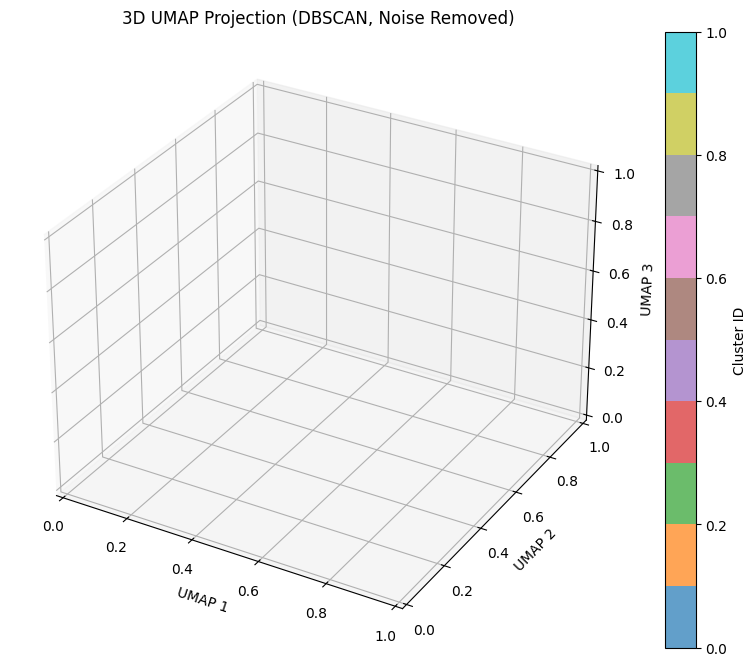

In [23]:

dbscan_df3 = df.copy()
dbscan3 = DBSCAN(eps=7, min_samples=10)
labels_df3 = dbscan3.fit_predict(dbscan_df3)

umap_model = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_model.fit_transform(dbscan_df3)

mask = labels_df3 != -1
X_umap_filtered3 = X_umap[mask]
labels_filtered3 = labels_df3[mask]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_umap_filtered3[:, 0], X_umap_filtered3[:, 1], X_umap_filtered3[:, 2],
                     c=labels_filtered3, cmap="tab10", alpha=0.7)

ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_zlabel("UMAP 3")
ax.set_title("3D UMAP Projection (DBSCAN, Noise Removed)")
fig.colorbar(scatter, label="Cluster ID")
plt.show()

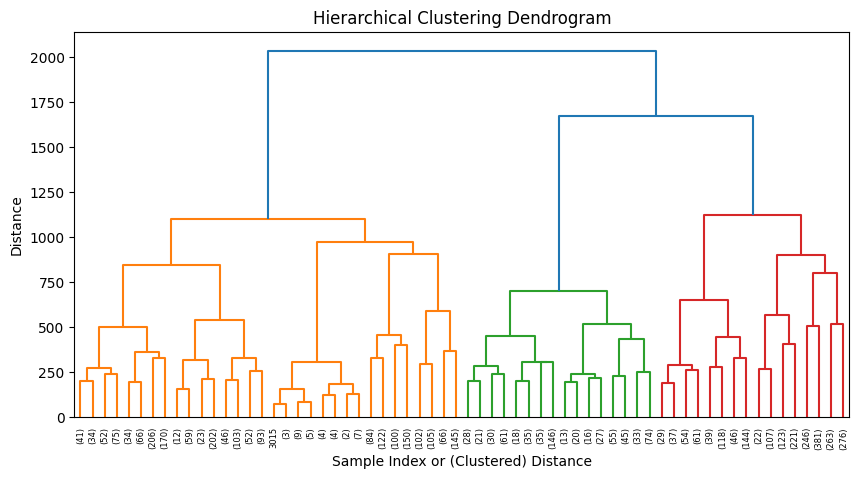

In [24]:
linked = linkage(df, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index or (Clustered) Distance")
plt.ylabel("Distance")
plt.show()

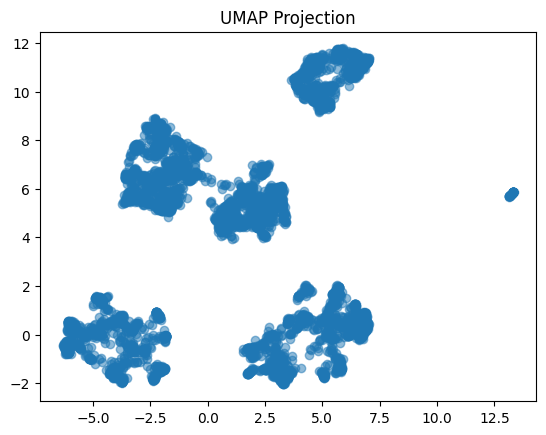

In [25]:
umap_model = umap.UMAP(random_state=42)
X_umap = umap_model.fit_transform(df)

plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.5)
plt.title("UMAP Projection")
plt.show()

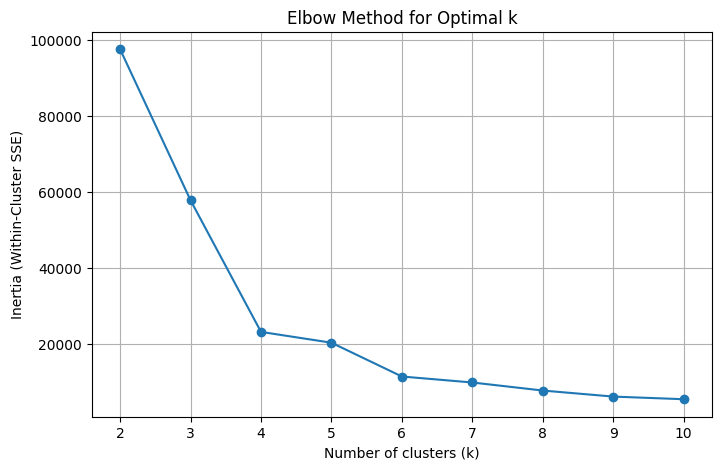

In [26]:
scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_umap)
    scores.append(kmeans.inertia_) # Within-Cluster Sum of Squares

plt.figure(figsize=(8, 5))
plt.plot(k_range, scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Within-Cluster SSE)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

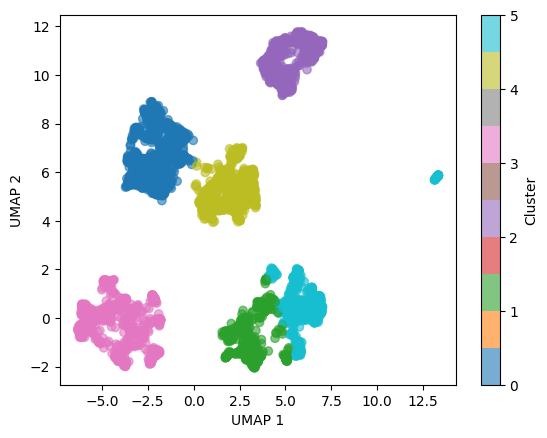

In [27]:
kmeans1 = KMeans(n_clusters=6, random_state=42)
labels1 = kmeans1.fit_predict(X_umap)

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels1, cmap='tab10', alpha=0.6)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(label="Cluster")
plt.show()

In [28]:
sil_coeff = silhouette_score(X_umap,labels1)
print("Silhouette Coefficient:", round(sil_coeff, 3))

score = calinski_harabasz_score(X_umap, labels1)
print("Calsinki - harabasz score:",score)

Silhouette Coefficient: 0.622
Calsinki - harabasz score: 13676.316


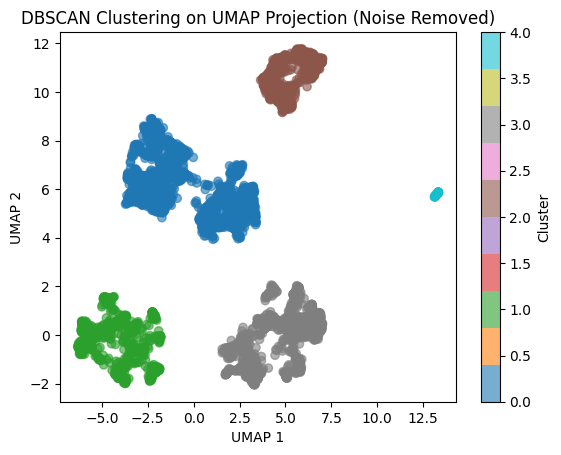

In [29]:
dbscan5 = DBSCAN(eps=.6, min_samples=4)
labels5 = dbscan5.fit_predict(X_umap)

mask = labels5 != -1
X_umap_filtered5 = X_umap[mask]
labels5_filtered = labels5[mask]

plt.scatter(X_umap_filtered5[:, 0], X_umap_filtered5[:, 1], c=labels5_filtered, cmap="tab10", alpha=0.6)
plt.title("DBSCAN Clustering on UMAP Projection (Noise Removed)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(label="Cluster")
plt.show()

In [30]:
sil_coeff = silhouette_score(X_umap,labels5)
print("Silhouette Coefficient:", round(sil_coeff, 3))

score = calinski_harabasz_score(X_umap, labels5)
print("Calsinki - harabasz score:",score)

Silhouette Coefficient: 0.652
Calsinki - harabasz score: 9156.228


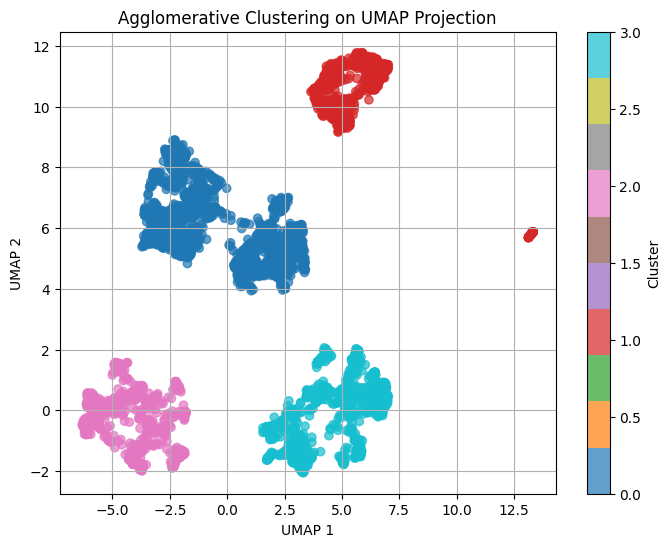

In [31]:
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')  # 'ward' requires Euclidean distance
labels6 = agg.fit_predict(X_umap)

plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels6, cmap="tab10", alpha=0.7)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("Agglomerative Clustering on UMAP Projection")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

In [32]:
sil_coeff = silhouette_score(X_umap,labels6)
print("Silhouette Coefficient:", round(sil_coeff, 3))

Silhouette Coefficient: 0.643
